# Lecture 3
# Keras and TensorFlow
**Notes on February 10, 2022**

Constant and random tensors

In [1]:
##Constant tensors
import tensorflow as tf
x = tf.ones(shape=(2,1)) ## cf. np.ones((2,1))
print(x)
x = tf.zeros(shape=(2,1)) ## np.zeros((2,1))
print(x)
x = tf.random.normal(shape=(3,1),mean=0.,stddev=1.)
print(x)
x = tf.random.uniform(shape=(3,1),minval=0.,maxval=1.)
print(x)

2022-02-14 09:20:06.585919: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-14 09:20:06.586613: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.27782437]
 [0.5607336 ]
 [0.4312466 ]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.11530221]
 [0.5780778 ]
 [0.82818615]], shape=(3, 1), dtype=float32)


NumPy tensors are assignable

In [6]:
import numpy as np
x = np.ones(shape=(2,2))
print(f"{x=}")
x[0,0]=0.
print(f"{x=}")

x=array([[1., 1.],
       [1., 1.]])
x=array([[0., 1.],
       [1., 1.]])


TensorFlow tensors are **note assignable**. See that the code below gives the error:

`TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment`

In [2]:
x = tf.ones(shape=(2,2))
x[0,0]=0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

A `tf.Variable` is assignable tensor

In [17]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(f"{v=}")
v.assign(tf.ones((3,1)))
print(f"{v=}")

with tf.device('/CPU:0'):
    X_var = tf.Variable(v)
    X_var[0, 0].assign(9)
    
print(f"{X_var=}")

v=<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.9405165],
       [-1.0810621],
       [ 0.6207298]], dtype=float32)>
v=<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>
X_var=<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[9.],
       [1.],
       [1.]], dtype=float32)>


`assign_add()` behaves like `+=`

In [23]:
v.assign(tf.zeros((3,1)))
print(f"{v=}")

v.assign_add(tf.ones((3,1))) 
print(f"{v=}")

v=<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.],
       [0.],
       [0.]], dtype=float32)>
v=<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


Basic math operations in TF.

Many NumPy operations are already in TensorFlow

In [33]:
a = tf.ones((2,2)) # 2x2 matrix of ones
print(f"{a=}")

b = tf.square(a) # Element wise square
print(f"{b=}")

c = tf.sqrt(a) # Element wise squareroot
print(f"{c=}")

d = b + c # Element wise addition
print(f"{d=}")

e = tf.matmul(a,b) # Matrix multiplication
print(f"{e=}")
e *= d # Element wise Mulitiply AND i.e. e = e*d
print(f"{e=}")

a=<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>
b=<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>
c=<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>
d=<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>
e=<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>
e=<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>


**More on the GradientTape API**

Gradient Tape with Variable

In [40]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result,input_var)

print(f"{gradient=}")

gradient=<tf.Tensor: shape=(), dtype=float32, numpy=6.0>


Gradient Tape with Constant. 
See that TF does not construct computational graph for `tf.constant`

In [42]:

input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
gradient = tape.gradient(result,input_const)
print(f"{gradient=}") #Gradient of a constant is None

gradient=None


Use `tape.watch()` to construct computational graph for constant tensors

In [43]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const) #Build computational graph for input_const
    result = tf.square(input_const)
gradient = tape.gradient(result,input_const)
print(f"{gradient=}")

gradient=<tf.Tensor: shape=(), dtype=float32, numpy=6.0>


Use nested gradient tapes to compute second-order gradients

In [46]:
time = tf.Variable(0.)

with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9*time**2
    speed = inner_tape.gradient(position,time)
acceleration = outer_tape.gradient(speed,time)

print(f"{acceleration=}")

acceleration=<tf.Tensor: shape=(), dtype=float32, numpy=9.8>


## End-to-end example: A linear classifier in pure TensorFlow

Mock machine learning job interview question
* Implement a linear classifier from scratch in TensorFlow using simple things like tensors, tensor operations, and gradients

Details:
* Generate two classes of random points in a 2D plane
* Generate corresponding targest (0 and 1)
* Plot the two-point classes 
* Define the linear classifier parameter variables
* Define the model (=forward pass)
* Define the mean squared error loss
* Define the training step function
* Run the training step for 40 times using all training data
* Bonus: plot the learned classifier and predicted classes

In [2]:
import numpy as np 
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0,3],cov=[[1,0.5],[0.5,1]],size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3,0],cov=[[1,0.5],[0.5,1]],size = num_samples_per_class)

In [51]:
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class,1),dtype="float32"),np.ones((num_samples_per_class,1),dtype="float32")))

Plot the two-point classes

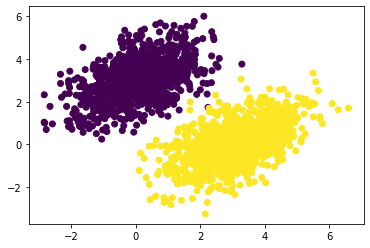

In [34]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])

plt.show()

Define the linear classifier parameter variables

In [55]:
input_dim = 2
output_dim = 1
W = tf.Variable(tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(tf.random.uniform(shape=(output_dim,)))

Define Model

In [57]:
def model(inputs):
    return tf.matmul(inputs,W)+b

Define the mean squared error loss function

In [64]:
def square_loss(targets,predictions):
    per_sample_losses = tf.square(targets-predictions) 
    return tf.reduce_mean(per_sample_losses)

Define the training step function

In [65]:
learning_rate = 0.1

def training_step(inputs,targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions,targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss,[W,b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b* learning_rate)
    return loss

Run the training step 40 times using all the training data

In [66]:
for step in range(40):
    loss = training_step(inputs,targets)
    print(f"loss at step {step}: {loss:4f}")

loss at step 0: 2.284064
loss at step 1: 0.201077
loss at step 2: 0.096511
loss at step 3: 0.077084
loss at step 4: 0.070712
loss at step 5: 0.066586
loss at step 6: 0.063063
loss at step 7: 0.059874
loss at step 8: 0.056961
loss at step 9: 0.054294
loss at step 10: 0.051851
loss at step 11: 0.049615
loss at step 12: 0.047567
loss at step 13: 0.045692
loss at step 14: 0.043975
loss at step 15: 0.042402
loss at step 16: 0.040962
loss at step 17: 0.039644
loss at step 18: 0.038436
loss at step 19: 0.037330
loss at step 20: 0.036318
loss at step 21: 0.035391
loss at step 22: 0.034542
loss at step 23: 0.033764
loss at step 24: 0.033053
loss at step 25: 0.032401
loss at step 26: 0.031804
loss at step 27: 0.031257
loss at step 28: 0.030757
loss at step 29: 0.030298
loss at step 30: 0.029878
loss at step 31: 0.029494
loss at step 32: 0.029142
loss at step 33: 0.028820
loss at step 34: 0.028525
loss at step 35: 0.028255
loss at step 36: 0.028007
loss at step 37: 0.027780
loss at step 38: 0.027

Bonus: Plot the learned classifier and predcted classes

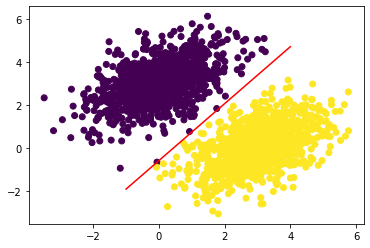

In [70]:
predictions = model(inputs)
x = np.linspace(-1,4,100)
y = - W [0]/ W [1]*x +(0.5- b )/ W [1]
plt.plot(x,y,"-r")
#Classify as negative if model returns value > 1
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0]>0.5) 
plt.show()

## Practice 3-1
* Add hidden layer with 5 nodes

In [4]:
import numpy as np 
import tensorflow as tf
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0,3],cov=[[1,0.5],[0.5,1]],size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3,0],cov=[[1,0.5],[0.5,1]],size = num_samples_per_class)

inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class,1),dtype="float32"),np.ones((num_samples_per_class,1),dtype="float32")))

In [42]:
input_dim = 2
hidden_dim = 5
output_dim = 1
W = tf.Variable(tf.random.uniform(shape=(input_dim,hidden_dim)))
b = tf.Variable(tf.random.uniform(shape=(hidden_dim,)))

W_hidden = tf.Variable(tf.random.uniform(shape=(hidden_dim,output_dim)))
b_hidden = tf.Variable(tf.random.uniform(shape=(output_dim,)))

In [43]:
def model(inputs):
    hidden = tf.matmul(inputs,W)+b
    return tf.matmul(hidden,W_hidden)+b_hidden

In [44]:
def square_loss(targets,predictions):
    per_sample_losses = tf.square(targets-predictions) 
    return tf.reduce_mean(per_sample_losses)

In [45]:
learning_rate = 0.01

def training_step(inputs,targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions,targets)
    grad_loss_wrt_W, grad_loss_wrt_b,grad_loss_wrt_W_hidden, grad_loss_wrt_b_hidden  = tape.gradient(loss,[W,b,W_hidden,b_hidden])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b* learning_rate)
    W_hidden.assign_sub(grad_loss_wrt_W_hidden * learning_rate)
    b_hidden.assign_sub(grad_loss_wrt_b_hidden* learning_rate)
    return loss

In [46]:
for step in range(400):
    loss = training_step(inputs,targets)
    print(f"loss at step {step}: {loss:4f}")

loss at step 0: 92.840736
loss at step 1: 1.685995
loss at step 2: 0.667621
loss at step 3: 0.292744
loss at step 4: 0.144794
loss at step 5: 0.084121
loss at step 6: 0.058328
loss at step 7: 0.046782
loss at step 8: 0.041170
loss at step 9: 0.038098
loss at step 10: 0.036164
loss at step 11: 0.034781
loss at step 12: 0.033697
loss at step 13: 0.032798
loss at step 14: 0.032029
loss at step 15: 0.031361
loss at step 16: 0.030775
loss at step 17: 0.030260
loss at step 18: 0.029805
loss at step 19: 0.029403
loss at step 20: 0.029047
loss at step 21: 0.028730
loss at step 22: 0.028449
loss at step 23: 0.028200
loss at step 24: 0.027977
loss at step 25: 0.027779
loss at step 26: 0.027601
loss at step 27: 0.027443
loss at step 28: 0.027301
loss at step 29: 0.027174
loss at step 30: 0.027060
loss at step 31: 0.026957
loss at step 32: 0.026864
loss at step 33: 0.026781
loss at step 34: 0.026705
loss at step 35: 0.026636
loss at step 36: 0.026574
loss at step 37: 0.026518
loss at step 38: 0.02

loss at step 348: 0.024484
loss at step 349: 0.024482
loss at step 350: 0.024481
loss at step 351: 0.024479
loss at step 352: 0.024477
loss at step 353: 0.024476
loss at step 354: 0.024474
loss at step 355: 0.024472
loss at step 356: 0.024471
loss at step 357: 0.024469
loss at step 358: 0.024467
loss at step 359: 0.024466
loss at step 360: 0.024464
loss at step 361: 0.024463
loss at step 362: 0.024461
loss at step 363: 0.024460
loss at step 364: 0.024458
loss at step 365: 0.024457
loss at step 366: 0.024455
loss at step 367: 0.024454
loss at step 368: 0.024452
loss at step 369: 0.024451
loss at step 370: 0.024449
loss at step 371: 0.024448
loss at step 372: 0.024446
loss at step 373: 0.024445
loss at step 374: 0.024443
loss at step 375: 0.024442
loss at step 376: 0.024440
loss at step 377: 0.024439
loss at step 378: 0.024438
loss at step 379: 0.024436
loss at step 380: 0.024435
loss at step 381: 0.024433
loss at step 382: 0.024432
loss at step 383: 0.024431
loss at step 384: 0.024429
l

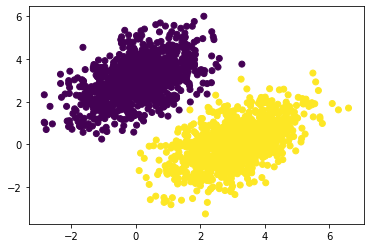

In [47]:
predictions = model(inputs)
x = np.linspace(-1,4,100)
#y = - W [0]/ W [1]*x +(0.5- b )/ W [1]
#plt.plot(x,y,"-r")
#Classify as negative if model returns value > 1
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0]>0.5) 
plt.show()

## Keras

Keras is higherlevel than Tensorflow

In [50]:
from tensorflow import keras
class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
        initializer="random_normal") ## cf. self.W = tf.Variable(tf.random.uniform(w_shape))
        self.b = self.add_weight(shape=(self.units,),initializer="zeros")
    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

my_dense = SimpleDense(units=32, activation=tf.nn.relu) #Note it is not necessary to specify input size
input_tensor = tf.ones(shape=(2, 784)) ## test input 
output_tensor = my_dense(input_tensor) 
print(output_tensor.shape)

(2, 32)


Automatic shape inference:
* A layer can only accept input tensors of a certain shape and will return an output tensor of a certain shape

In [1]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu") ## Will output tensor of n_sample x 32
## What about the input size?
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([ layers.Dense(32, activation="relu"), layers.Dense(32)
])

Metal device set to: Apple M1


2022-02-17 11:21:39.809337: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-17 11:21:39.809826: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


**Naive TensorFlow vs. keras**

In [53]:
## Naïve tf (From lecture 2)
model = NaiveSequential([
NaiveDense(input_size=784, output_size=32, activation="relu"),
NaiveDense(input_size=32, output_size=64, activation="relu"),
NaiveDense(input_size=64, output_size=32, activation="relu"),
NaiveDense(input_size=32, output_size=10, activation="softmax") 
])

## Keras
model = keras.Sequential([
SimpleDense(32, activation="relu"),
SimpleDense(64, activation="relu"),
SimpleDense(32, activation="relu"), 
SimpleDense(10, activation="softmax")
])

NameError: name 'NaiveSequential' is not defined

**Notes on February 17 2022**

Monitoring Loss on a Valuation Set

In [10]:
import numpy as np 
import tensorflow as tf
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0,3],cov=[[1,0.5],[0.5,1]],size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3,0],cov=[[1,0.5],[0.5,1]],size = num_samples_per_class)

inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class,1),dtype="float32"),np.ones((num_samples_per_class,1),dtype="float32")))

In [13]:
from tensorflow import keras
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),loss=keras.losses.MeanSquaredError(),metrics=[keras.metrics.BinaryAccuracy()])

## Let’s first permute training data
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

In [15]:
num_validation_samples =int(0.3*len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

model.fit(training_inputs,
          training_targets,
          epochs=5,
          batch_size=16,
          validation_data=(val_inputs,val_targets)) # Using keep track Validation data

Epoch 1/5
88/88 [==============================] - 0s 5ms/step - loss: 0.0663 - binary_accuracy: 0.9671 - val_loss: 0.2361 - val_binary_accuracy: 0.7133
Epoch 2/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0700 - binary_accuracy: 0.9636 - val_loss: 0.0294 - val_binary_accuracy: 0.9967
Epoch 3/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0687 - binary_accuracy: 0.9636 - val_loss: 0.0329 - val_binary_accuracy: 0.9983
Epoch 4/5
88/88 [==============================] - 0s 5ms/step - loss: 0.0707 - binary_accuracy: 0.9529 - val_loss: 0.1408 - val_binary_accuracy: 0.8033
Epoch 5/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0719 - binary_accuracy: 0.9550 - val_loss: 0.0828 - val_binary_accuracy: 0.9517


After fitting a model we can make predictions and evaluate performance using:
* `.predict()`
* `.evaluate()`

In [19]:
loss_and_metrics = model.evaluate(val_inputs, val_targets,batch_size=128)
predictions = model.predict(val_inputs,batch_size=128)
predictions[:10]

5/5 [==============================] - 0s 4ms/step - loss: 0.0828 - binary_accuracy: 0.9517


array([[-0.06001595],
       [-0.07197151],
       [ 0.8540273 ],
       [ 0.58210874],
       [-0.4688023 ],
       [ 0.5633357 ],
       [ 0.8264022 ],
       [-0.27616653],
       [-0.1913161 ],
       [-0.16757748]], dtype=float32)